In [1]:
from data.dataset import YoloDataset

In [2]:
from pathlib import Path
import os

In [3]:
yaml_path = os.path.join(os.getcwd(),"data/flower.yaml")

In [4]:
traindata = YoloDataset(yaml_path = yaml_path)

In [5]:
traindata.__len__()

1840

In [39]:
im_tensor, label = traindata.__getitem__(10)

In [13]:
label.shape

(7, 7, 10)

In [35]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [11]:

MEAN = 0.485, 0.456, 0.406 # RGB
STD = 0.229, 0.224, 0.225 # RGB
def to_image(tensor, mean=MEAN, std=STD):
    #convert tensor to image 
    denorm_tensor = tensor.clone()
    for t, m, s in zip(denorm_tensor, mean, std):
        t.mul_(s).add_(m)
    denorm_tensor.clamp_(min=0, max=1.)
    denorm_tensor *= 255
    image = denorm_tensor.permute(1,2,0).numpy().astype(np.uint8)
    return image

In [40]:
image = to_image(im_tensor)

In [41]:
img_w,img_h = image.shape[:2]

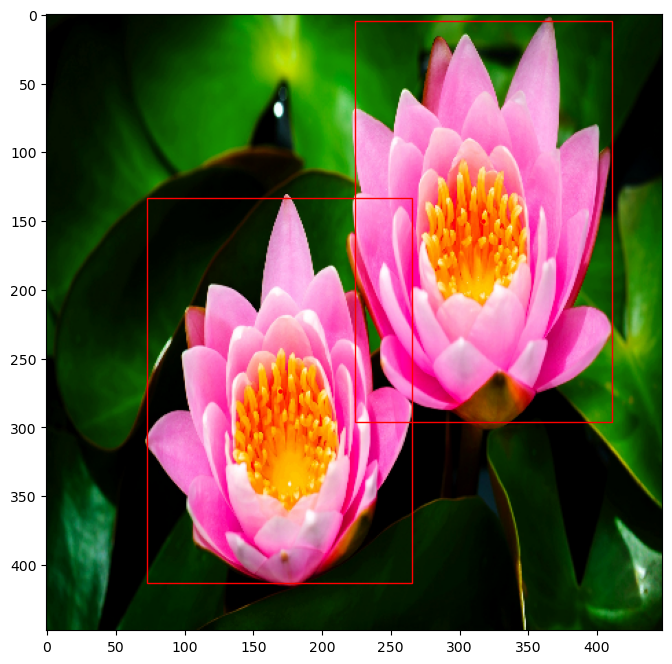

In [42]:
plt.figure(figsize=(8,8))
plt.imshow(image)
ax = plt.gca()
for i in range(7):
    for j in range(7):
        if label[i,j,9] == 1:
            x,y,w,h = np.array(label[i,j,5:9]) 
            x = ((x+i)/7)*(img_w)
            y = ((y+j)/7)*(img_h)
            # print(x,y)
            w = (w*img_w)/2
            h = (h*img_h)/2
            rect = Rectangle((x-w,y-h),w*2,h*2,linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
            plt.scatter(x,y, s=5, color="red")
plt.show()

In [27]:
for i in range(7):
    for j in range(7):
        if label[i,j,9]==1:
            print(label[i,j])

[0.        0.        0.        0.        1.        0.9250001 0.791
 0.191     0.176     1.       ]
[0.         0.         0.         0.         1.         0.93399984
 0.72400004 0.791      0.764      1.        ]
[0.         0.         0.         0.         1.         0.14400005
 0.532      0.105      0.141      1.        ]


In [ ]:
draw = ImageDraw.Draw(image) 
for i in range(7):
    for j in range(7):
        if label[i,j,5] == 1:
            x,y = label[i,j,6]*(w/7), label[i,j,7]*(h/7)
            x += (w/7)*j
            y += (h/7)*i
            draw.point((x,y), fill=(255,0, 0))
image.save("output_with_points.jpg")

In [1]:
from utils.metrics import iou
import torch

In [2]:
preds = torch.rand(4,7,7,15)
target = torch.rand(4,7,7,10)

In [3]:
ious = torch.cat(
            [iou(preds[...,7:11], target[...,6:10]).unsqueeze(0),
            iou(preds[...,11:15], target[...,6:10]).unsqueeze(0)], dim=0   
        )
print(ious.shape)
_, bestbox = torch.max(ious, dim=0) # return the best bounding box among two
exists_box = target[...,5:6]  #in paper this is Iobj_i
print(bestbox.shape)

torch.Size([2, 4, 7, 7, 1])
torch.Size([4, 7, 7, 1])
